In [3]:
import pandas as pd 
import numpy as np 
import torch 
from matplotlib import pyplot as plt 
import seaborn as sbn 
from sklearn import datasets

# Neural Network Tutorial 

In [100]:
n_samples = 1000

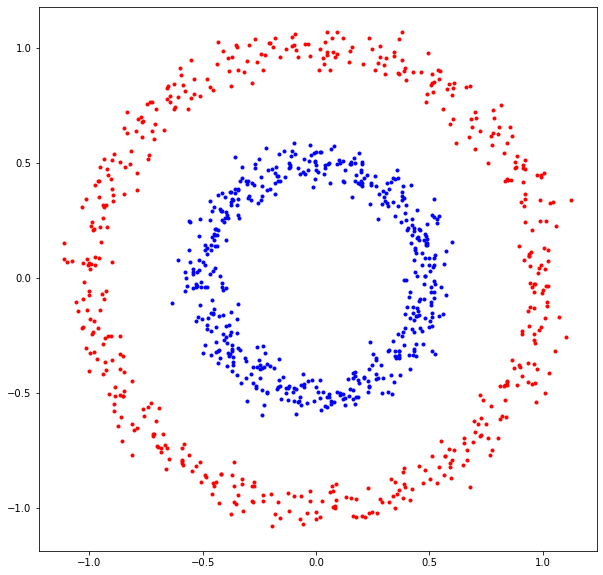

In [167]:
X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)
red = y==0
blue = y==1

plt.figure(figsize=(10,10))
plt.plot(X[red, 0], X[red, 1], 'r.')
plt.plot(X[blue, 0], X[blue, 1], 'b.')
plt.show()

In [128]:
# make train/test splits | 50/50 split
train_mask = torch.randint(size=y.shape, low=0, high=2) == 1
x_train = torch.tensor(X[train_mask], dtype=torch.float)
y_train = torch.tensor(y[train_mask], dtype=torch.float)

x_test = torch.tensor(X[~train_mask], dtype=torch.float)
y_test = torch.tensor(y[~train_mask], dtype=torch.float)

# pytorch basics

In [102]:
a = torch.tensor([1,2,3])
a

tensor([1, 2, 3])

In [103]:
b = torch.tensor([3,2,1])

a*b # element wise multiplication 

tensor([3, 4, 3])

In [104]:
a @ b # matrix multiplication 

tensor(10)

## define our forward pass (Logistic regression)

In [147]:
class Logistic(torch.nn.Module): 
    def __init__(self):
        '''
        initialize our model and paramters
        ''' 
        super().__init__()

        self.lin = torch.nn.Linear(2,1) 

    def forward(self, x): 
        '''
        forward pass 
        '''
        x = self.lin(x)
        x = torch.sigmoid(x)
        return x

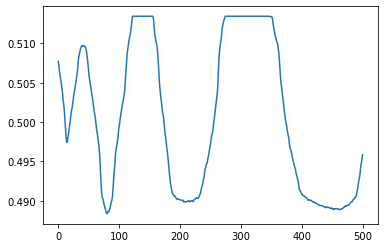

In [154]:
# init a model
linear_model = Logistic()

# define our critiria (Binary Cross Entropy)
criteria = torch.nn.BCELoss()

# define our optimizer 
optim = torch.optim.Adam(linear_model.parameters(), lr=1e-2)

# record losses 
acc = []

# training loop 
for epoch in range(500): 
    
    # forward pass 
    yhat = linear_model(x_train)

    # calculate loss of the forward pass 
    loss = criteria(yhat.squeeze(), y_train)

    # calculate parameter specific gradients 
    loss.backward() 

    # update parameter weights 
    optim.step()

    acc.append(((yhat > 0.5) == y_train).float().mean())

plt.figure()
plt.plot(acc)
plt.show()

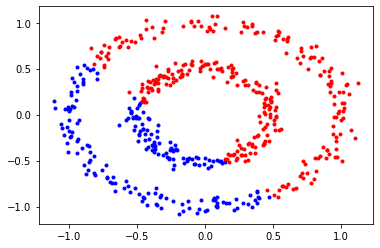

In [155]:
# what does our decision boundary look like? 
yhat = linear_model(x_test)
preds = (yhat.squeeze() > 0.5).detach().numpy() 

plt.figure()
plt.plot(x_test[preds, 0], x_test[preds, 1], 'b.')
plt.plot(x_test[~preds, 0], x_test[~preds, 1], 'r.')
plt.show()
    

# Now, let's try a 2-layer neural network

In [157]:
class NN(torch.nn.Module): 
    def __init__(self, channels):
        '''
        initialize our model and paramters
        ''' 
        super().__init__()

        self.lin = torch.nn.Linear(2,channels) 
        self.out = torch.nn.Linear(channels, 1)
        self.nonlin = torch.nn.ReLU()

    def forward(self, x): 
        '''
        forward pass 
        '''
        x = self.lin(x)
        x = self.nonlin(x)
        x = self.out(x)
        x = torch.sigmoid(x)
        return x

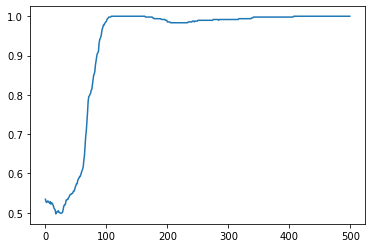

In [164]:
# init a model
model = NN(channels=50)

# define our critiria (Binary Cross Entropy)
criteria = torch.nn.BCELoss()

# define our optimizer 
optim = torch.optim.Adam(model.parameters(), lr=5e-4)

# record losses 
acc = []

# training loop 
for epoch in range(500): 
    
    # forward pass 
    yhat = model(x_train)

    # calculate loss of the forward pass 
    loss = criteria(yhat.squeeze(), y_train)

    # calculate parameter specific gradients 
    loss.backward() 

    # update parameter weights 
    optim.step()

    acc.append(((yhat.squeeze().detach() > 0.5) == y_train).float().mean())

plt.figure()
plt.plot(acc)
plt.show()

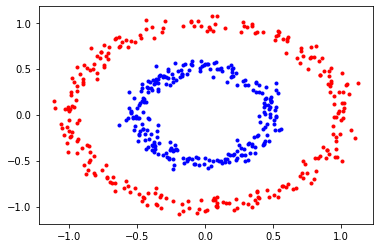

In [165]:
# what does our decision boundary look like? 
yhat = model(x_test)
preds = (yhat.squeeze() > 0.5).detach().numpy() 

plt.figure()
plt.plot(x_test[preds, 0], x_test[preds, 1], 'b.')
plt.plot(x_test[~preds, 0], x_test[~preds, 1], 'r.')
plt.show()